# Natural Language Process (NLP)

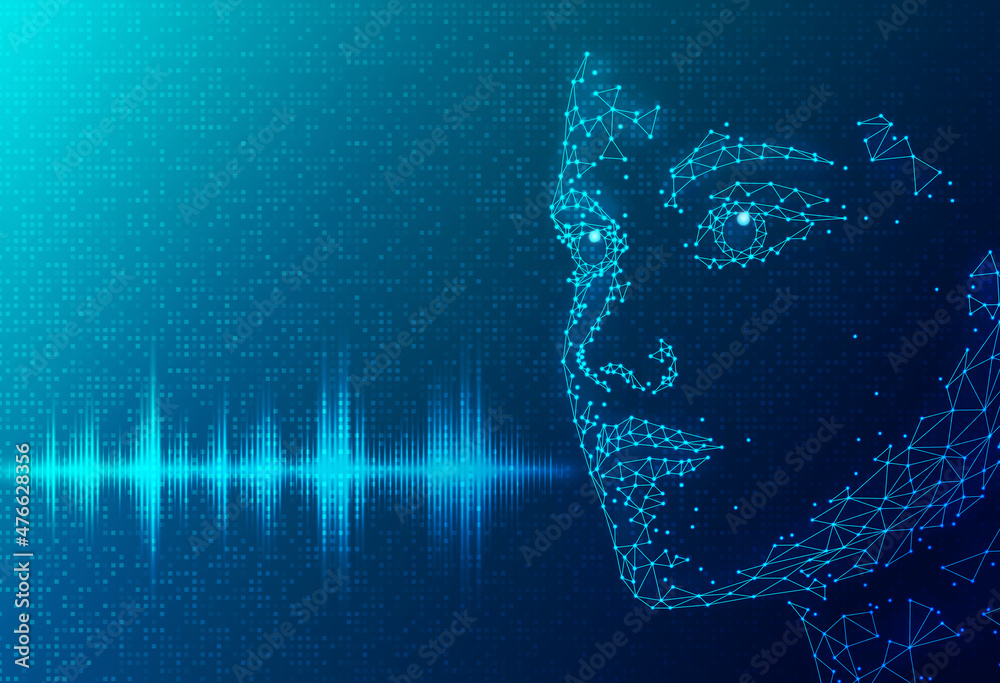

In [1]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/Naive-Bayes/main/SpamClassifier-with-ML/sms_spam_data/SMSSpamCollection.csv",sep="\t",header=None,names=["labels","messages"])

In [2]:
data

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Data are besed on "ham" and "spam" ham is important And spam is not important

In [3]:
data["messages"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: messages, Length: 5572, dtype: object

In [4]:
import nltk
import re #regular expression

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
data["messages"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### we need clear this words

In [8]:
re.sub('[^a-zA-Z]',"",data["messages"][0]) #when we remove space

'GountiljurongpointcrazyAvailableonlyinbugisngreatworldlaebuffetCinetheregotamorewat'

In [9]:
re.sub('[^a-zA-Z]'," ",data["messages"][0]) #space is important therefore we need this

'Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   '

In [10]:
re.sub('[^a-zA-Z]'," ",data["messages"][0]).lower()

'go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   '

In [11]:
re.sub('[^a-zA-Z]'," ",data["messages"][0]).lower().split()

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

In [12]:
words=re.sub('[^a-zA-Z]'," ",data["messages"][0]).lower().split()

### Now we need to remove stopwords

In [13]:
[word for word in words if word not in stopwords.words("english") ]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [14]:
### Now we need to do stemmer

In [15]:
ps=PorterStemmer()

In [16]:
[ps.stem(word)for word in words if word not in stopwords.words("english") ]

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [17]:
" ".join([ps.stem(word) for word in words if word not in stopwords.words("english") ])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [19]:
 for i in range(0,len(data)):
        print(data["messages"][i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R entitl

In [20]:
 for i in range(0,len(data)):
        review=re.sub("[^a-zA-Z]"," ",data["messages"][i])
        print(review)

Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   
Ok lar    Joking wif u oni   
Free entry in   a wkly comp to win FA Cup final tkts   st May       Text FA to       to receive entry question std txt rate T C s apply            over   s
U dun say so early hor    U c already then say   
Nah I don t think he goes to usf  he lives around here though
FreeMsg Hey there darling it s been   week s now and no word back  I d like some fun you up for it still  Tb ok  XxX std chgs to send        to rcv
Even my brother is not like to speak with me  They treat me like aids patent 
As per your request  Melle Melle  Oru Minnaminunginte Nurungu Vettam   has been set as your callertune for all Callers  Press    to copy your friends Callertune
WINNER   As a valued network customer you have been selected to receivea      prize reward  To claim call              Claim code KL     Valid    hours only 
Had your mobile    months or more  U R entitl

In [21]:
corpus=[]
for i in range(0,len(data)):
    review=re.sub("[^a-zA-Z]"," ",data["messages"][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words("english") ]
    review=" ".join(review)
    corpus.append(review)


In [22]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [23]:
data["messages"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [24]:
corpus[10]

'gonna home soon want talk stuff anymor tonight k cri enough today'

"When you are compair data or corpus we got in corpus there has clean words,stopwords not there,spelling mistake there,word got beased on root"

In [18]:
### Now we need to do lammetization

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv=CountVectorizer()

In [27]:
cv.fit_transform(corpus)
# when we do fit and transform than we got object therefore we need to convert into array

<5572x6296 sparse matrix of type '<class 'numpy.int64'>'
	with 45127 stored elements in Compressed Sparse Row format>

In [28]:
cv.fit_transform(corpus).toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
X=cv.fit_transform(corpus).toarray()

In [31]:
X.shape

(5572, 6296)

In [32]:
data.shape

(5572, 2)

#### based on the shape we can say that there has 6296 feature into the corpus

In [49]:
data.labels

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: labels, Length: 5572, dtype: object

In [ ]:
# we need to convert categorical value into numerical form

In [51]:
pd.get_dummies(data["labels"],drop_first=True)

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [52]:
y=pd.get_dummies(data["labels"],drop_first=True)  #we intialize "y"

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

## We choose multinomial naive bayes model because there are many feature 

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
from sklearn.metrics import accuracy_score

model=MultinomialNB()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9935897435897436


In [60]:
y_predict=model.predict(X_test)
accuracy_score=accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9772727272727273
